## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

## Implementar K-means simples do zero

### Descrição

Implementar uma versão simples do K-means do zero. Por simples, deve-se entender que nenhuma das otimizações do K-means precisa ser implementada. Assume-se que deverá ser criada uma função que receba como parâmetros o número de clusters `k`, o conjunto de dados em formato Numpy `X`, e um parâmetro `random_state`, retornando os centróides finais e os labels. Os centróides devem ser um Numpy array e os labels devem ser uma lista, onde cada elemento é um inteiro representando o cluster.

```python
def do_kmeans_clustering(k, X, random_state):
  # seu código aqui
  return centroids, final_clusters
```

### Requisitos

* Criar método com nome `do_kmeans_clustering`, que receba um parâmetro `k`, um parâmetro `X` e um parâmetro `random_state`, representando número de clusters, dados e inteiro a ser usado como seed (para função `random`), respectivamente.
* O método deve possuir dois retornos, sendo que o primeiro são os centróides e segundo são os grupos finais. O formato de retorno dos grupos finais é livre.
* Assuma que `X` terá shape `(num_instances, num_features)`, onde `n_features = 2`.
* Assuma que os centróides finais tenham shape `(k, num_features)`.
* Assuma que os clusters (labels) sejam uma lista de tamanho `num_instances`.
* A inicialização dos centróides dos clusters deve ser aleatória e baseada no `random_state`.
* O algoritmo deve executar até que os clusters não mudem. Portanto, não temos um número máximo de iterações.
* Deve conter ao menos um método de plot para verificar os grupos finais em relação aos dados.
* A base de dados usada é sintética e para tal deve ser utilizado o método `make_blobs` do `sklearn.datasets.sample_generator`

## Implementação

### Imports
Utilizar bibliotecas que achar mais pertinente. Lembre-se dos detalhes do matplotlib e do seaborn para utilizá-los em notebooks (ver outros notebooks da aula).

In [68]:
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

%matplotlib inline

### Criar base de dados sintética
Utilizar o método `make_blobs` do ScikitLearn com os parâmetros já fornecidos. Informar `random_state` como `100`

In [10]:
centers = 3
n_features = 2
n_samples = 300

x, y = datasets.make_blobs(n_samples = n_samples, n_features = n_features, centers = centers, random_state = 100)

data = pd.DataFrame(x, columns = ['x', 'y'])
data['label'] = y

### Plotar a base de dados inicial
Dica: lembre-se que utilizamos o `sns.scatterplot` e utilizando o dataset como um Pandas dataframe. Caso tenham dúvidas, revise os notebooks da aula.

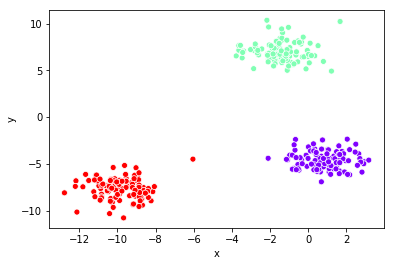

In [12]:
_ = sns.scatterplot(x = 'x', y = 'y', data = data, hue = 'label', palette = 'rainbow', legend = False)

### K-means

In [96]:
def do_kmeans_clustering(k, X, random_state):
    np.random.seed(random_state)
    
    # Use the mean to initialize centroids
    #
    # Start with a random number and sum
    # x mean and y mean
    mean = np.mean(X, axis = 0)
    centroids = np.random.randn(k, 2)
    
    for i in range(0, k):
        centroids[i][0] = centroids[i][0] + mean.x
        centroids[i][1] = centroids[i][1] + mean.y
    
    # Calculate distances
    #
    # While the error is bigger than a given threshold
    # keep recalculating the centers
    
    # Dummy error initialization
    error = 1000000
    
    while error >= 0.2:
        # Initialize distances and
        # ignore the "label" column
        # from dataframe
        data = X[['x', 'y']]  
        distances = np.zeros((X.shape[0], k))

        # For each cluster, calculate the vector norm
        # which is the euclidian distance
        for i in range(k):
            distances[:, i] = np.linalg.norm(data - centroids[i], axis = 1)

        # Labels will the arguments that produce the
        # smallest distance. That is, the cluster
        # that is closer to each instance
        labels = np.argmin(distances, axis = 1)

        # Copy centroids so that we can calculate the error later
        centroids_tmp = deepcopy(centroids)

        # Recalculate centroids using the mean
        # of all instances with the same label
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis = 0)
        
        # Calculate the error using new centroids and the
        # copied old centroids
        error = np.linalg.norm(centroids - centroids_tmp)

    return centroids, labels

### Treinamento

Realizar treinamento com `k = 3` e `random_state = 30`.

In [67]:
centroids, labels = do_kmeans_clustering(3, data, 30)

### Plotar grupos resultantes

Utilizar dois métodos: `sns.scatterplot` para os dados e `plt.scatter` para os centróides. Caso tenha dúvidas, revise os exemplos dos notebooks da aula.

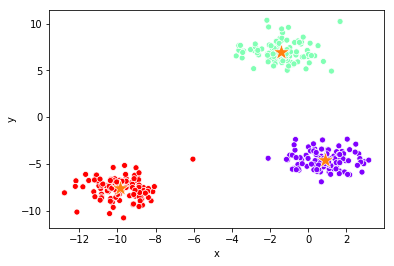

In [91]:
cent_df = pd.DataFrame(centroids, columns = ['x', 'y'])

_ = sns.scatterplot(x = 'x', y = 'y', data = data, hue = 'label', palette = 'rainbow', legend = False)
_ = sns.scatterplot(x = 'x', y = 'y', data = cent_df, legend = False, marker = "*", s = 300)

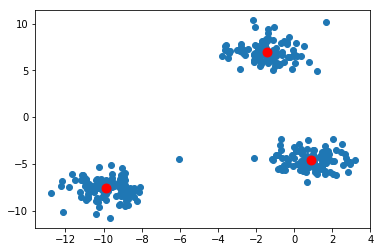

In [94]:
_ = plt.scatter(data["x"], data["y"])
_ = plt.scatter(cent_df["x"], cent_df["y"], color = 'red',  s = 80)

### Pergunta

Após finalizar a implementação, faça testes com diferentes valores para o `random_state`. O que você pode observar?

É possível observar os efeitos da inicialização aleatório dos centróides, o que pode vir a causar alguns erros na hora de associar as instâncias a cada grupo.

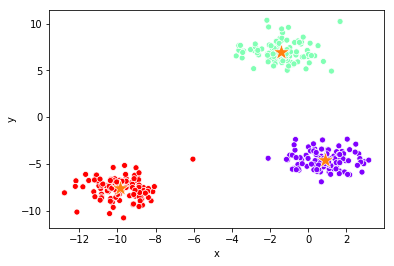

In [97]:
centroids, labels = do_kmeans_clustering(3, data, 50)

cent_df = pd.DataFrame(centroids, columns = ['x', 'y'])

_ = sns.scatterplot(x = 'x', y = 'y', data = data, hue = 'label', palette = 'rainbow', legend = False)
_ = sns.scatterplot(x = 'x', y = 'y', data = cent_df, legend = False, marker = "*", s = 300)

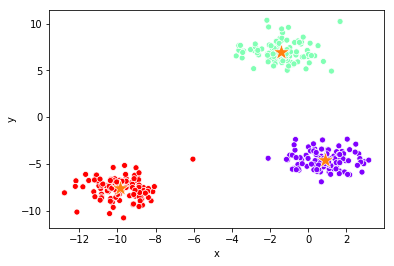

In [98]:
centroids, labels = do_kmeans_clustering(3, data, 75)

cent_df = pd.DataFrame(centroids, columns = ['x', 'y'])

_ = sns.scatterplot(x = 'x', y = 'y', data = data, hue = 'label', palette = 'rainbow', legend = False)
_ = sns.scatterplot(x = 'x', y = 'y', data = cent_df, legend = False, marker = "*", s = 300)